In [2]:
import matplotlib.pyplot as plt
import sys
import numpy as np
import cantera as ct
from matplotlib import *
import csv

Temp='1600'
species_data = np.loadtxt('D:/2_Cantera/Python_files/0D/Alborz_Results/Alborz_Results_'+Temp+'/debug/species_mole_fractions.dat')

<Figure size 1400x1000 with 0 Axes>

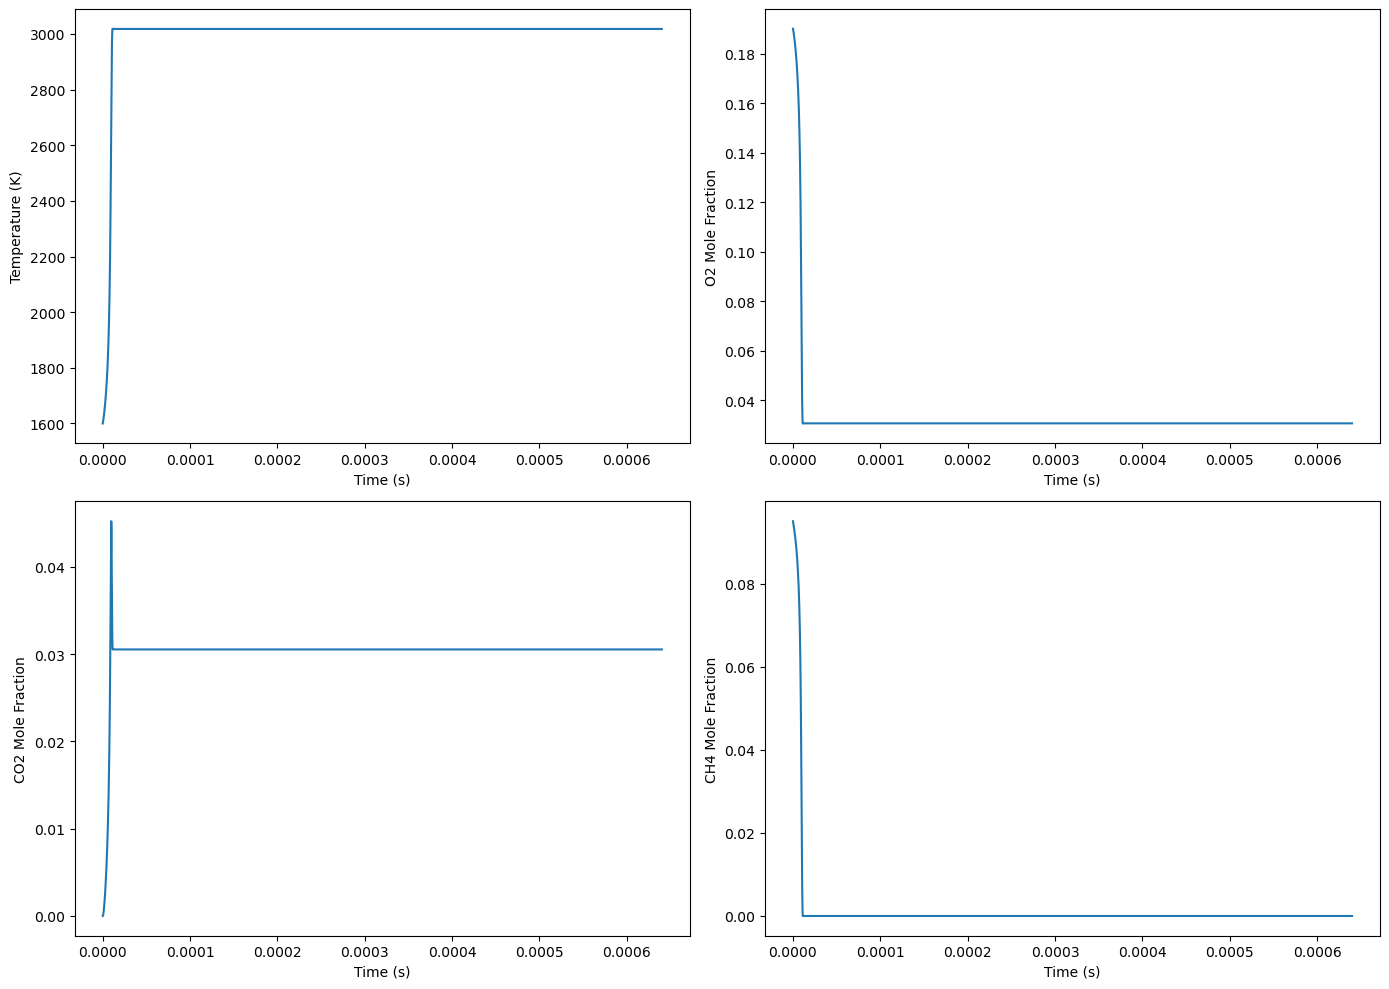

In [3]:
#   columns         0           1       2          3    4       5   6       7   8
# species_order = [Iteration, Time, Temperature, 'O2', 'H2O','CH4','CO', 'CO2', 'N2']

# Plotting (if needed)
plt.rcParams['figure.figsize'] = (14, 10)
plt.clf()

# Create subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot Temperature vs. Time
axs[0, 0].plot(species_data[:, 1], species_data[:, 2])
axs[0, 0].set_xlabel('Time (s)')
axs[0, 0].set_ylabel('Temperature (K)')

# Plot O2 Mole Fraction vs. Time
axs[0, 1].plot(species_data[:, 1], species_data[:, 3])
axs[0, 1].set_xlabel('Time (s)')
axs[0, 1].set_ylabel('O2 Mole Fraction')

# Plot CO2 Mole Fraction vs. Time
axs[1, 0].plot(species_data[:, 1], species_data[:, 7])
axs[1, 0].set_xlabel('Time (s)')
axs[1, 0].set_ylabel('CO2 Mole Fraction')

# Plot CH4 Mole Fraction vs. Time
axs[1, 1].plot(species_data[:, 1], species_data[:, 5])
axs[1, 1].set_xlabel('Time (s)')
axs[1, 1].set_ylabel('CH4 Mole Fraction')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [3]:
'''
# Read data from the file
x_values = []
y_values = []

with open('D:/2_Cantera/alborz/build/Alborz_Results_1600/debug/temp_monitor.dat', 'r') as file:
    for line in file:
        columns = line.split()
        if len(columns) >= 3:
            x_values.append(float(columns[1]))
            y_values.append(float(columns[2]))
            
# Find the maximum value of the second column (temperature)
max_temperature = max(y_values)
print(f"The maximum temperature is: {max_temperature} K")

# Create the plot
plt.plot(x_values, y_values, linestyle='-', color='b')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (K)')
plt.title('Temperature Monitoring')
plt.grid(True)
plt.show()


# Read the data from the file
species_data = np.loadtxt('D:/2_Cantera/alborz/build/Alborz_Results_1600/debug/species_mole_fractions.dat')
# Define the order of species columns based on your data
# Modify this list to match the order in your file
species_order = ['O2', 'H2O','CH4','CO', 'CO2', 'N2']

# Find the smaller of the two arrays
num_rows = min(species_data.shape[0], temperature_data.shape[0])

# Extract time values from the first column of species_data (considering only up to the smaller array)
times = species_data[:num_rows, 0]

# Create a dictionary to store species data (considering only up to the smaller array)
species_data_dict = {}
for i, species in enumerate(species_order):
species_data_dict[species] = species_data[:num_rows, i + 1]
# Combine temperature and species data
combined_data = np.column_stack((temperature_data[:num_rows], species_data_dict.values()))

# Read the data from the file
species_data = np.loadtxt('D:/2_Cantera/alborz/build/Alborz_Results/debug/species_mole_fractions.dat')

# Define the order of species columns based on your data
# Modify this list to match the order in your file
species_order = ['O2', 'H2O','CH4','CO', 'CO2', 'N2']

# Read temperature data from the second CSV file
temperature_data = np.loadtxt('D:/2_Cantera/alborz/build/Alborz_Results/debug/temp_monitor.dat', delimiter=' ')

# Find the smaller of the two arrays
num_rows = min(species_data.shape[0], temperature_data.shape[0])

# Extract time values from the first column of species_data (considering only up to the smaller array)
times = species_data[:num_rows, 0]

# Create a dictionary to store species data (considering only up to the smaller array)
species_data_dict = {}
for i, species in enumerate(species_order):
    species_data_dict[species] = species_data[:num_rows, i + 1]

# Combine temperature and species data
combined_data = np.column_stack((temperature_data[:num_rows], species_data_dict.values()))


# Add temperature data as a column in species_data (considering only up to the smaller array)
species_data_dict['Temperature'] = temperature_data[:num_rows]

# Create an array to store the data, including time, temperature, and mole fractions
num_species = len(species_order) + 1  # Include temperature
num_columns = 1 + num_species  # Time + Temperature + Mole Fractions
species_data = np.empty((num_rows, num_columns))

# Populate the array with time, temperature, and mole fractions
species_data[:, 0] = times  # Time is in the first column
species_data[:, 1] = species_data_dict['Temperature']  # Temperature is in the second column
for i, species in enumerate(species_order):
    species_data[:, i + 2] = species_data_dict[species]

# Save the combined data to a final CSV file
header = 'Time (s),Temperature (K),' + ','.join(species_order)
np.savetxt('alborz_final_species_data.csv', species_data, delimiter=',', header=header, comments='')

# Plotting (if needed)
plt.rcParams['figure.figsize'] = (14, 10)
plt.clf()

# Create subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot Temperature vs. Time
axs[0, 0].plot(species_data[:, 0], species_data[:, 1])
axs[0, 0].set_xlabel('Time (s)')
axs[0, 0].set_ylabel('Temperature (K)')

# Plot O2 Mole Fraction vs. Time
axs[0, 1].plot(species_data[:, 0], species_data[:, 2])
axs[0, 1].set_xlabel('Time (s)')
axs[0, 1].set_ylabel('O2 Mole Fraction')

# Plot CO2 Mole Fraction vs. Time
axs[1, 0].plot(species_data[:, 0], species_data[:, 3])
axs[1, 0].set_xlabel('Time (s)')
axs[1, 0].set_ylabel('CO2 Mole Fraction')

# Plot CH4 Mole Fraction vs. Time
axs[1, 1].plot(species_data[:, 0], species_data[:, 4])
axs[1, 1].set_xlabel('Time (s)')
axs[1, 1].set_ylabel('CH4 Mole Fraction')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

'''

'\n# Read data from the file\nx_values = []\ny_values = []\n\nwith open(\'D:/2_Cantera/alborz/build/Alborz_Results_1600/debug/temp_monitor.dat\', \'r\') as file:\n    for line in file:\n        columns = line.split()\n        if len(columns) >= 3:\n            x_values.append(float(columns[1]))\n            y_values.append(float(columns[2]))\n            \n# Find the maximum value of the second column (temperature)\nmax_temperature = max(y_values)\nprint(f"The maximum temperature is: {max_temperature} K")\n\n# Create the plot\nplt.plot(x_values, y_values, linestyle=\'-\', color=\'b\')\nplt.xlabel(\'Time (s)\')\nplt.ylabel(\'Temperature (K)\')\nplt.title(\'Temperature Monitoring\')\nplt.grid(True)\nplt.show()\n\n\n# Read the data from the file\nspecies_data = np.loadtxt(\'D:/2_Cantera/alborz/build/Alborz_Results_1600/debug/species_mole_fractions.dat\')\n# Define the order of species columns based on your data\n# Modify this list to match the order in your file\nspecies_order = [\'O2\', 